In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
def tanh_f(x):
    return np.tanh(x - 1)

In [39]:
def polynom_f(x):
    a = 0.0001
    return x ** 3 + (0.1 * x**2) + a * x

In [40]:
def secant(f, x0, x1, eps_r, eps_a):
    counter = 0
    listOfX = []
    con = True
    while con:
        counter += 1
        x = x1 - (f(x1) * (x1 - x0)) / (f(x1) - f(x0))
        listOfX.append(x)
        if abs(x1 - x) < eps_a or abs((x1 - x)/x) < eps_r:
            con = False
            return listOfX, counter, x
        x0 = x1
        x1 = x

secant(tanh_f, 0, 3, 0.0001, 0.0001)

([1.3240343582607024,
  0.5176934196290265,
  0.99233066339004,
  1.0005956904152864,
  0.9999999892279561,
  1.0000000000000013],
 6,
 1.0000000000000013)

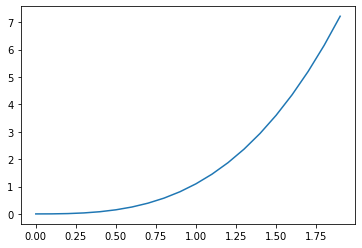

In [41]:
values = []
for i in np.arange(0, 2, 0.1):
    values.append(polynom_f(i))
plt.plot(np.arange(0, 2, 0.1), values)